#### **0. Object Color Search**

In [1]:
%cd D:/AIC2024

D:\AIC2024


In [2]:
from utils.object_color_search.object_color_search import ObjectColorSearch
from notebooks.utils import display_images
import time

c:\Users\LONG\anaconda3\envs\aic2024-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


resource module not available on Windows


#### **1. Global Search**

In [3]:
# oclass_search_type và bbox_search_type có thể lựa chọn bm25 hoặc tf-idf
object_color_search = ObjectColorSearch(
    oclass_search_type='bm25',
    bbox_search_type='bm25'
)

BM25S Retrieve:   0%|          | 0/1 [00:00<?, ?it/s]

Thời gian truy vấn: 0.7333817481994629


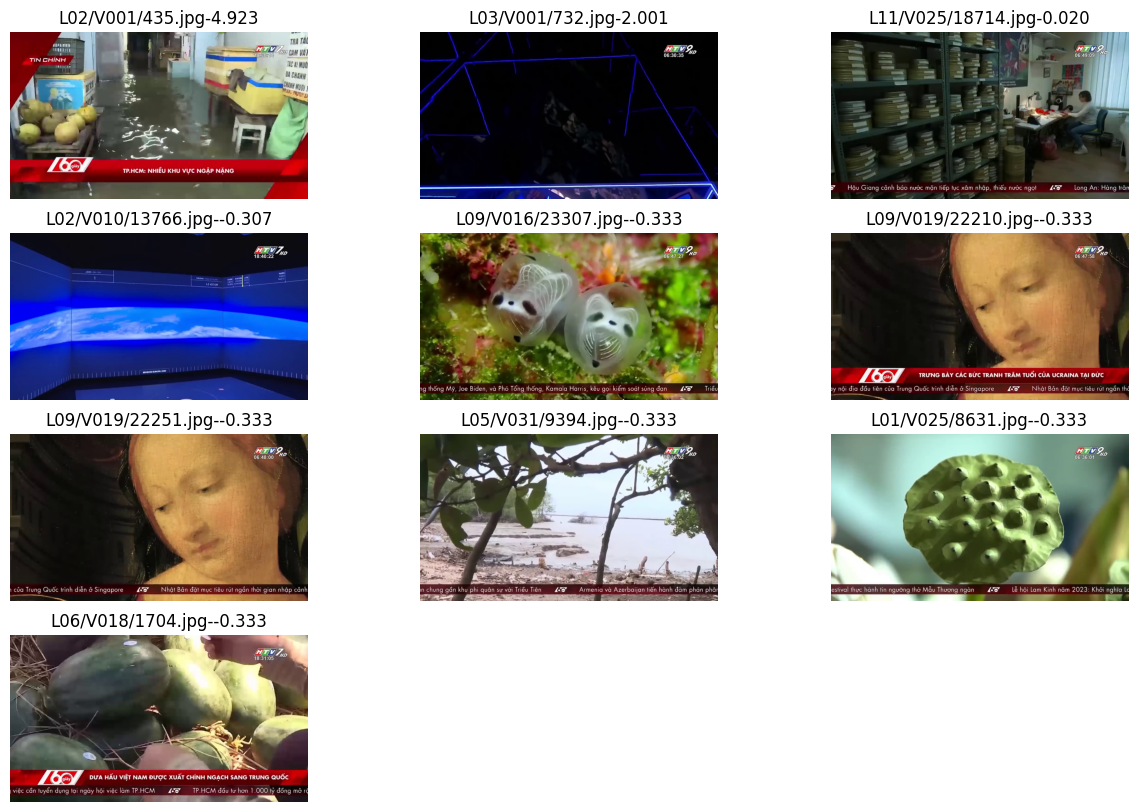

In [4]:
top_k = 10
bbox_queries = {
    'object_bbox': 'b3apple b4apple f2person f3chair f3person f4chair f4person f5chair f5person g2person g3chair g3person g4chair g4person g5chair g5person',
    'color_bbox': 'a0black a1black a1blue a1violet a2black a2blue a2violet a3black a4black a4blue a5black a6black a6blue a6violet b0black b0blue b1black b1blue b1violet b2black b3black b4black b5black b6black b6blue b6violet c0black c1black c1blue c1violet c2black c3black c4black c5black c6black c6blue c6violet d0black d1black d1blue d2black d3black d4black d5black d6black d6blue d6grey d6violet d6white e0black e1black e1blue e1violet e2black e3black e4black e5black e6black e6blue e6grey e6violet f0black f1black f1blue f2black f3black f3blue f4black f5black f6black f6blue f6violet g0black g0white g1black g2black g3black g4black g4blue g5black g5blue g5violet g6black g6blue g6violet'
}
oclass_queries = {
    'object_class': 'apple1 chair1 person1',
    'object_number': 'apple1 chair1 person1',
    'color_class': None
}
# Nếu image-path_subset là None thì mặc định là search global
image_path_subset = None
start_time = time.time()
results = object_color_search.metadata_search(oclass_queries, bbox_queries, image_path_subset, top_k)
end_time = time.time()

print('Thời gian truy vấn:', end_time - start_time)
display_images(results)

#### **2. Fusion Search**

Thời gian truy vấn: 0.40683555603027344


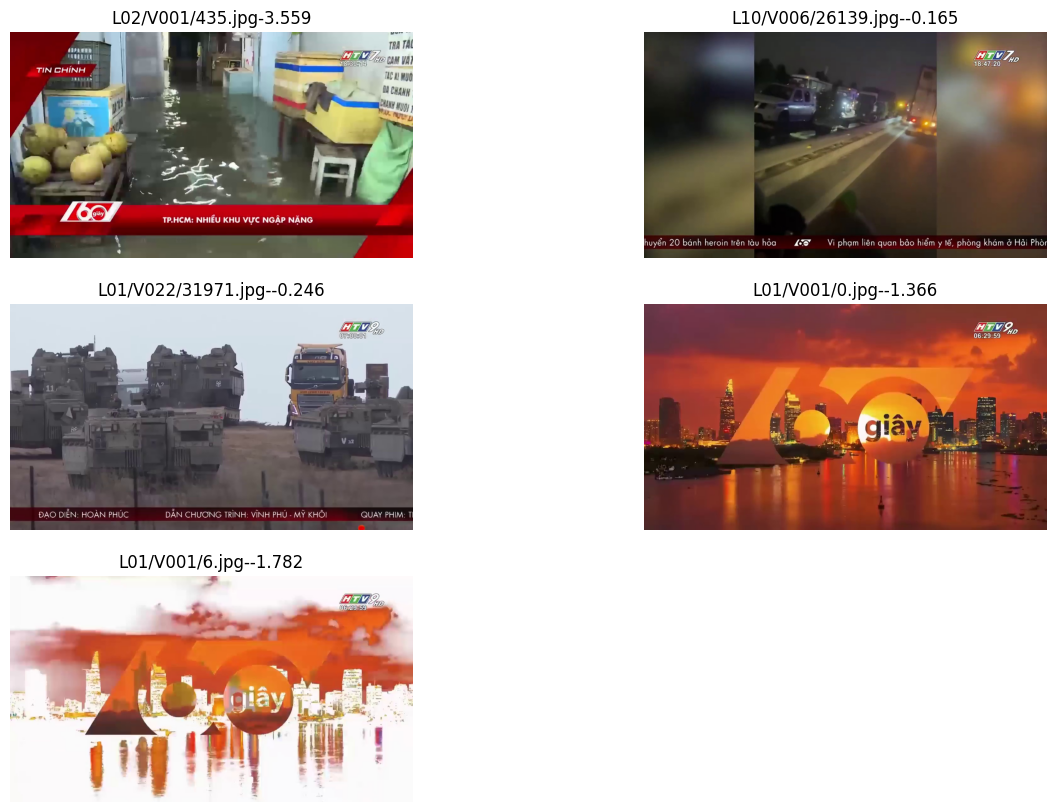

In [6]:
# Sử dụng kết quả của khung hình phải để search, giả sử kết quả của BLIP, CLIP trả về kết quả như sau
image_path_subset = [
    "./distilled_keyframe/L01/V001/0.jpg", 
    "./distilled_keyframe/L01/V001/6.jpg",
    "./distilled_keyframe/L01/V022/31971.jpg",
    "./distilled_keyframe/L10/V006/26139.jpg",
    "./distilled_keyframe/L02/V001/435.jpg"
]

top_k = 10
bbox_queries = {
    'object_bbox': 'b3apple b4apple f2person f3chair f3person f4chair f4person f5chair f5person g2person g3chair g3person g4chair g4person g5chair g5person',
    'color_bbox': 'a0black a1black a1blue a1violet a2black a2blue a2violet a3black a4black a4blue a5black a6black a6blue a6violet b0black b0blue b1black b1blue b1violet b2black b3black b4black b5black b6black b6blue b6violet c0black c1black c1blue c1violet c2black c3black c4black c5black c6black c6blue c6violet d0black d1black d1blue d2black d3black d4black d5black d6black d6blue d6grey d6violet d6white e0black e1black e1blue e1violet e2black e3black e4black e5black e6black e6blue e6grey e6violet f0black f1black f1blue f2black f3black f3blue f4black f5black f6black f6blue f6violet g0black g0white g1black g2black g3black g4black g4blue g5black g5blue g5violet g6black g6blue g6violet'
}
oclass_queries = {
    'object_class': 'apple1 chair1 person1',
    'object_number': 'apple1 chair1 person1',
    'color_class': None
}

start_time = time.time()
results = object_color_search.metadata_search(oclass_queries, bbox_queries, image_path_subset, top_k)
end_time = time.time()

print('Thời gian truy vấn:', end_time - start_time)
display_images(results)